<a href="https://colab.research.google.com/github/sasansharifipour/Spark_Class/blob/main/train_sheypoor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
file_download_link = "https://drive.google.com/u/0/uc?id=1K2a4mliN8l4aO1S8TWyn29EN25Y4WLlQ&export=download" 
!wget -O data.csv --no-check-certificate "$file_download_link"

--2021-05-24 15:51:02--  https://drive.google.com/u/0/uc?id=1K2a4mliN8l4aO1S8TWyn29EN25Y4WLlQ&export=download
Resolving drive.google.com (drive.google.com)... 173.194.216.100, 173.194.216.101, 173.194.216.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-70-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/olkchat4qpls6ugdnlkkpvuojrfme832/1621871400000/14577798666193718332/*/1K2a4mliN8l4aO1S8TWyn29EN25Y4WLlQ?e=download [following]
--2021-05-24 15:51:04--  https://doc-0g-70-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/olkchat4qpls6ugdnlkkpvuojrfme832/1621871400000/14577798666193718332/*/1K2a4mliN8l4aO1S8TWyn29EN25Y4WLlQ?e=download
Resolving doc-0g-70-docs.googleusercontent.com (doc-0g-70-docs.googleusercontent.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to doc-0g-70-docs.googleusercontent.co

In [43]:
import pandas as pd
import keras
from keras import layers

class onehot_autoencoder:
  def __init__(self, features, num_of_epochs):
    self.features = features
    self.num_of_epochs = num_of_epochs
    self.encoders = []
    self.columns_name = []
  
  def create_auto_encoder(self, input_dim, encoding_dim):
    
    input_layer = keras.Input(shape=(input_dim,))
    encoded = layers.Dense(encoding_dim, activation='sigmoid')(input_layer)
    decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)
    
    autoencoder = keras.Model(input_layer, decoded)
    encoder = keras.Model(input_layer, encoded)

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder, encoder

  def get_columns_name(self):
    return self.columns_name.copy()

  def fit_transform(self, data):
    self.data = data
    self.features_list = [item[0] for item in self.features]
    result_df = pd.DataFrame()

    for column_name in self.data.columns:
      if (column_name not in self.features_list):
        if result_df.empty:
          feature_df = pd.DataFrame(data=self.data[column_name], columns=[column_name])
          result_df = feature_df
        else:
          feature_df = pd.DataFrame(data=self.data[column_name], columns=[column_name])
          result_df = result_df.join(feature_df)

    for (feature_name, feature_cnt) in self.features:

      df = pd.get_dummies(data[feature_name], prefix=feature_name)
      autoencoder, encoder = self.create_auto_encoder(len(df.columns), feature_cnt)
      autoencoder.fit(df, df, epochs = self.num_of_epochs, batch_size=256, shuffle=True, verbose=0)
      y = encoder.predict(df)
      self.encoders.append(encoder)

      columns_name = []
      for i in range(feature_cnt):
        columns_name.append(feature_name + '_' + str(i))

      self.columns_name.extend(columns_name)

      if result_df.empty:
        feature_df = pd.DataFrame(data=y, columns=columns_name)
        result_df = feature_df
      else:
        feature_df = pd.DataFrame(data=y, columns=columns_name)
        result_df = result_df.join(feature_df)

    return result_df

In [54]:
import pandas as pd
from sklearn import preprocessing

data = pd.read_csv('data.csv')

df = pd.DataFrame(data)
df.rename( columns={'Unnamed: 0':'row_number'}, inplace=True )

view_idx_title = 'view_idx'
df[view_idx_title] = df.groupby('userid').cumcount() + 1
max_value = max(df[view_idx_title].values)
df[view_idx_title] = df[view_idx_title].values / max_value

df.head()

,row_number,userid,time,source,adstatus,item,count_views,view_idx
0,0,1274821301586/54e79450-bbee-4770-9e47-1d56e120...,2021-05-05 18:00:00.000,Chrome,۳ روز پیش,A,1,0.004831
1,1,1274821301586/54e79450-bbee-4770-9e47-1d56e120...,2021-05-05 18:00:00.000,Chrome,۴ روز پیش,A,1,0.009662
2,2,1325384907441/5e5766d8-46cb-480d-886a-7d557542...,2021-05-01 10:00:00.000,Android,۲ روز پیش,B,1,0.004831
3,3,1325384907441/5e5766d8-46cb-480d-886a-7d557542...,2021-05-01 10:00:00.000,Android,۶ روز پیش,B,1,0.009662
4,4,1337524499886/ad464731-6288-4e04-8a1a-aa9c004f...,2021-05-03 05:00:00.000,Android,ساعاتی پیش,A,1,0.004831


In [35]:
df_category = pd.DataFrame(df['userid'],columns=['userid'])
df_category.head()

,userid
0,1274821301586/54e79450-bbee-4770-9e47-1d56e120...
1,1274821301586/54e79450-bbee-4770-9e47-1d56e120...
2,1325384907441/5e5766d8-46cb-480d-886a-7d557542...
3,1325384907441/5e5766d8-46cb-480d-886a-7d557542...
4,1337524499886/ad464731-6288-4e04-8a1a-aa9c004f...


In [55]:
df_cnt = pd.DataFrame(df_category.value_counts(subset=['userid'], sort=False),columns=['cnt'])
df_cnt

,cnt
userid,
1274821301586/54e79450-bbee-4770-9e47-1d56e120bf80,2
1325384907441/5e5766d8-46cb-480d-886a-7d5575421f84,2
1337524499886/ad464731-6288-4e04-8a1a-aa9c004fd88a,10
1388595558952/140968f0-913f-455b-98b5-4ab1737ba2a4,9
1388846967652/b95f5627-e7a8-4b2f-bace-6a8d4306f28e,18
...,...
1624281947727/f3841e1b-18fd-47d8-9eb5-7b80bcac67ee,1
1644886390833/9d21c456-db01-4e01-b6b8-8d5019f0ed75,1
1651749233345/413f5cb9-48ab-41b2-a2f2-55f2e1b0cbbe,5


In [39]:
df_cnt.median()

cnt    1.0
dtype: float64

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20).fit(df_cnt)
df_cnt['lbl'] = kmeans.predict(df_cnt) 
df_cnt.groupby('lbl').agg({'cnt': ['mean', 'min', 'max', 'count']})

cnt                 
           mean  min  max  count
lbl                             
0      1.000000    1    1  26751
1     31.615385   29   35    195
2      3.000000    3    3   4772
3      7.433152    7    8   1653
4     93.826087   88  104     23
5     11.852497   11   13    861
6     19.685315   18   22    429
7     51.052632   47   56     57
8    117.857143  107  131     14
9      5.407216    5    6   3104
10   187.800000  178  207      5
11    41.027211   36   46    147
12    25.143382   23   28    272
13     2.000000    2    2   9184
14    15.333882   14   17    608
15     9.424760    9   10    937
16     4.000000    4    4   2818
17    76.606061   71   85     33
18    64.137255   58   70     51
19   147.333333  138  160      3

In [44]:
encoder = onehot_autoencoder([ ('source', 1), ('item', 2), ('adstatus', 5)], 1)
onehot_df = encoder.fit_transform(df)
onehot_df.head()

,row_number,userid,time,count_views,view_idx,source_0,item_0,item_1,adstatus_0,adstatus_1,adstatus_2,adstatus_3,adstatus_4
0,0,1274821301586/54e79450-bbee-4770-9e47-1d56e120...,2021-05-05 18:00:00.000,1,0.004831,0.274065,0.767979,0.754583,0.821887,0.812411,0.777952,0.809045,0.748146
1,1,1274821301586/54e79450-bbee-4770-9e47-1d56e120...,2021-05-05 18:00:00.000,1,0.009662,0.274065,0.767979,0.754583,0.701636,0.846398,0.838196,0.715203,0.809522
2,2,1325384907441/5e5766d8-46cb-480d-886a-7d557542...,2021-05-01 10:00:00.000,1,0.004831,0.647948,0.421545,0.532877,0.758017,0.788939,0.772551,0.772350,0.780255
3,3,1325384907441/5e5766d8-46cb-480d-886a-7d557542...,2021-05-01 10:00:00.000,1,0.009662,0.647948,0.421545,0.532877,0.840607,0.729186,0.830395,0.757346,0.826193
4,4,1337524499886/ad464731-6288-4e04-8a1a-aa9c004f...,2021-05-03 05:00:00.000,1,0.004831,0.647948,0.767979,0.754583,0.832812,0.835581,0.774592,0.762287,0.773449


In [62]:
import random

class recurrent_net_with_regression():
  def __init__(self, data, group_data_column_name, train_percentage = 70, val_percentage = 20, test_percentage = 10):
    self.data = data
    self.group_data_column_name = group_data_column_name
    self.train_percentage = train_percentage
    self.val_percentage = val_percentage
    self.test_percentage = test_percentage
    df_category = pd.DataFrame(self.data[group_data_column_name],columns=[group_data_column_name])
    self.df_cnt = pd.DataFrame(df_category.value_counts(subset=[group_data_column_name], sort=False),columns=['cnt'])
  
  def split_data(self):
    unique_lst = self.data[self.group_data_column_name].unique()

    test_cnt = int(len(unique_lst) * self.test_percentage / 100)
    val_cnt = int(len(unique_lst) * self.val_percentage / 100)
    train_cnt = int(len(unique_lst) - test_cnt - val_cnt)

    random.shuffle(unique_lst)

    self.test_data = unique_lst[:test_cnt]
    self.val_data = unique_lst[test_cnt : test_cnt + val_cnt]
    self.train_data = unique_lst[ test_cnt + val_cnt : ]
  
  def find_user_row_count(self, user):
    return self.df_cnt.loc[user,'cnt']


  def preparing_data(self):
    
    for user in self.test_data:
      cnt = self.find_user_row_count(user)
      print(cnt)



In [63]:
spliter = recurrent_net_with_regression(onehot_df, 'userid', 80, 15, 15)
spliter.split_data()
spliter.preparing_data()

Streaming output truncated to the last 5000 lines.
1614710398948/415bd057-1904-4655-a0f2-cbd8754db222    4
Name: cnt, dtype: int64
userid                                            
1620362832592/2ca80008-a220-4a9b-bcdf-0b85c2decf82    1
Name: cnt, dtype: int64
userid                                            
1620017609183/b1d371cd-a982-4ebf-bf50-579213b74a1e    1
Name: cnt, dtype: int64
userid                                            
1620308345236/2b8cbdab-23e2-43c4-a159-d0c6f8c7d0d7    2
Name: cnt, dtype: int64
userid                                            
1614848130303/26ef22b0-8345-4a3c-9eb0-9cc5825cd335    1
Name: cnt, dtype: int64
userid                                            
1619884450373/7526d51d-abee-4453-9e1b-4728bc7b3a49    1
Name: cnt, dtype: int64
userid                                            
1616861244609/94bfe241-059b-4421-ae64-b3c696c2954d    1
Name: cnt, dtype: int64
userid                                            
1615208811182/4b9a4330-2398-4fe7

KeyboardInterrupt: ignored

In [49]:
spliter = recurrent_net_with_regression(onehot_df, 'userid', 80, 15, 15)
spliter.split_data()

In [ ]:
features_name.clear()
features_name = encoder.get_columns_name()
features_name.append(view_idx_title)
label_name = 'count_views'
features_name

['source_0',
 'item_0',
 'item_1',
 'adstatus_0',
 'adstatus_1',
 'adstatus_2',
 'adstatus_3',
 'adstatus_4',
 'view_idx']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

class regression_model():
  def __init__(self, data, features_name, label_name, train_percentage = 0.7, val_percentage = 0.2, test_percentage = 0.1):
    self.data = data
    self.features_name = features_name
    self.label_name = label_name
    self.train_percentage = train_percentage
    self.val_percentage = val_percentage
    self.test_percentage = test_percentage

    self.X = self.data[features_name]
    self.Y = self.data[label_name]

    val_size = val_percentage / (1 - test_percentage)
    
    X_train, X_test, Y_train, Y_test = train_test_split(self.X, self.Y, test_size=test_percentage, random_state=1)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=val_size, random_state=1)

    self.X_train = X_train
    self.X_val = X_val
    self.X_test = X_test

    self.Y_train = Y_train
    self.Y_val = Y_val
    self.Y_test = Y_test

  def create_net(self, input_dim):
    input_layer = keras.Input(shape=(input_dim,))
    first_layer = layers.Dense(10, activation='sigmoid')(input_layer)
    second_layer = layers.Dense(5, activation='relu')(first_layer)
    output_layer = layers.Dense(1, activation='relu')(second_layer)
    
    net = keras.Model(input_layer, output_layer)

    net.compile(optimizer='adam', loss='mean_squared_error')
    return net

  def fit(self):
    model = GradientBoostingRegressor(n_estimators=800)
    model.fit(self.X_train, self.Y_train)

    predictions = model.predict(self.X_test)
    print(mean_squared_error(self.Y_test, predictions))
    





In [ ]:
model = regression_model(onehot_df, features_name, label_name, 0.8, 0.1, 0.1)


In [ ]:
model.fit()

4.1020849139775315


In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
df.head()

,Unnamed: 0,userid,time,source,adstatus,item,count_views
0,0,1274821301586/54e79450-bbee-4770-9e47-1d56e120...,2021-05-05 18:00:00.000,Chrome,۳ روز پیش,A,1
1,1,1274821301586/54e79450-bbee-4770-9e47-1d56e120...,2021-05-05 18:00:00.000,Chrome,۴ روز پیش,A,1
2,2,1325384907441/5e5766d8-46cb-480d-886a-7d557542...,2021-05-01 10:00:00.000,Android,۲ روز پیش,B,1
3,3,1325384907441/5e5766d8-46cb-480d-886a-7d557542...,2021-05-01 10:00:00.000,Android,۶ روز پیش,B,1
4,4,1337524499886/ad464731-6288-4e04-8a1a-aa9c004f...,2021-05-03 05:00:00.000,Android,ساعاتی پیش,A,1


In [ ]:
import networkx as nx

def create_graph(data):
  graph = nx.Graph()

  for index, row in data.iterrows():
    source_node = row["userid"]
    destination_node = str(row["adstatus"])
    item_destination_node = str(row["item"])
    source_destination_node = str(row["source"])

    prior_weight = row["count_views"]

    graph.add_node(source_node, node_type='user')
    graph.add_node(destination_node, node_type='adstatus')
    graph.add_node(item_destination_node, node_type='item')
    graph.add_node(source_destination_node, node_type='source')

    node_attributes = graph.get_edge_data(source_node, destination_node)

    if (node_attributes is not None):
      prior_weight = prior_weight + node_attributes["weight"]

    prior_weight = 1;
    graph.add_weighted_edges_from([
                                   (source_node, destination_node, prior_weight),
                                   (source_node, item_destination_node, prior_weight),
                                   (source_node, source_destination_node, prior_weight),
                                   (destination_node, item_destination_node, prior_weight)
                                   ])

  return graph


graph = create_graph(df)

In [ ]:
#page_ranks = nx.pagerank(graph, weight ='weight', max_iter =1000, alpha=0.85)
page_ranks = nx.pagerank(graph, max_iter =1000, alpha=0.85)

In [ ]:
user_nodes = list({n for n, d in graph.nodes(data=True) if d["node_type"] == "user"})
item_nodes = list({n for n, d in graph.nodes(data=True) if d["node_type"] == "item"})
page_ranks.get(user_nodes[0])

8.144699724519055e-06

In [ ]:
min(page_ranks.values())

7.902686161329932e-06

In [ ]:
def extract_features(graph, page_ranks):
  user_nodes = list({n for n, d in graph.nodes(data=True) if d["node_type"] == "user"})
  item_nodes = list({n for n, d in graph.nodes(data=True) if d["node_type"] == "item"})
  adstatus_nodes = list({n for n, d in graph.nodes(data=True) if d["node_type"] == "adstatus"})
  source_nodes = list({n for n, d in graph.nodes(data=True) if d["node_type"] == "source"})

  column_names = []
  column_names.extend(item_nodes.copy())
  column_names.extend(adstatus_nodes.copy())
  column_names.extend(source_nodes.copy())
  column_names.insert(0, 'user_rank')
  column_names.insert(0, 'user_id')

  data = []

  for user in user_nodes :
    user_rank = page_ranks.get(user)
    row_data = [user, user_rank]

    for item in item_nodes :
      item_rank = page_ranks.get(item)

      node_weight = 0
      node_attributes = graph.get_edge_data(user, item)
      
      if (node_attributes is not None):
        node_weight = node_attributes["weight"]
        
      calculated_feature = node_weight * user_rank * item_rank
      row_data.append(calculated_feature)
    
    for item in adstatus_nodes :
      item_rank = page_ranks.get(item)

      node_weight = 0
      node_attributes = graph.get_edge_data(user, item)
      
      if (node_attributes is not None):
        node_weight = node_attributes["weight"]
        
      calculated_feature = node_weight * user_rank * item_rank
      row_data.append(calculated_feature)

    for item in source_nodes :
      item_rank = page_ranks.get(item)

      node_weight = 0
      node_attributes = graph.get_edge_data(user, item)
      
      if (node_attributes is not None):
        node_weight = node_attributes["weight"]
        
      calculated_feature = 1 * user_rank * item_rank
      row_data.append(calculated_feature)

    data.append(row_data)
  
  df = pd.DataFrame(data, columns = column_names)
  return df

In [ ]:
df_features = extract_features(graph, page_ranks)

In [ ]:
df_features.head(10)

,user_id,user_rank,A,B,C,ساعاتی پیش,۱ سال پیش,۱ روز پیش,۱ هفته پیش,۵ ماه پیش,۲ روز پیش,۱۰ ماه پیش,۲ هفته پیش,دقایقی پیش,لحظاتی پیش,۴ روز پیش,۳ ماه پیش,۵ روز پیش,۳ روز پیش,۸ ماه پیش,۷ ماه پیش,۱۱ ماه پیش,۶ روز پیش,۱ ماه پیش,۴ هفته پیش,۲ ماه پیش,۳ هفته پیش,۴ ماه پیش,۹ ماه پیش,۶ ماه پیش,Android,Chrome
0,1616044255144/74abc9fe-3abd-4f8b-a48d-7165fc44...,0.000008,5.399870e-07,0.000000e+00,0.000000e+00,4.726908e-07,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,7.732854e-09,9.265459e-07
1,1616439213041/6ccb934d-70f3-4ae7-a0ef-2e7b0c5c...,0.000008,5.399870e-07,0.000000e+00,0.000000e+00,4.726908e-07,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,7.732854e-09,9.265459e-07
2,1616766530803/b35221a5-243b-402e-be40-f882d141...,0.000011,7.488753e-07,0.000000e+00,0.000000e+00,6.555464e-07,0.0,2.889739e-07,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.423924e-07,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.072423e-08,1.284970e-06
3,1618468173263/6a55ba83-55a5-4854-bb19-8a243dd7...,0.000008,0.000000e+00,0.000000e+00,1.002933e-07,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.474000e-07,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,7.699713e-09,9.225749e-07
4,1619597237452/7f06cd64-59b2-4674-99f5-81fe3734...,0.000016,1.057778e-06,0.000000e+00,0.000000e+00,9.259521e-07,0.0,0.000000e+00,3.526434e-07,0.0,2.690650e-07,0.0,2.459444e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,2.011277e-07,0.0,0.0,0.0,1.220254e-07,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.514786e-08,1.815007e-06
5,1618762640624/14ec0ad3-90f0-43f6-b8ff-94f6163c...,0.000026,1.691668e-06,0.000000e+00,0.000000e+00,1.480843e-06,0.0,6.527761e-07,5.639703e-07,0.0,4.303064e-07,0.0,3.933303e-07,4.692156e-07,4.637613e-07,2.665401e-07,0.0,2.272711e-07,3.216565e-07,0.0,0.0,0.0,1.951509e-07,0.0,0.0,0.0,3.134807e-07,0.0,0.0,0.0,2.422544e-08,2.902677e-06
6,1620177074096/d5eb5af7-0831-4c4a-bfc1-c28501fd...,0.000008,5.399870e-07,0.000000e+00,0.000000e+00,4.726908e-07,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,7.732854e-09,9.265459e-07
7,1619946446310/0f19f07e-6327-430b-bcde-db0805da...,0.000008,0.000000e+00,3.310678e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,1.250171e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,7.699876e-09,9.225945e-07
8,1615054190354/cc4b2ef9-3499-4e92-9c53-84d7d5a2...,0.000008,0.000000e+00,3.287336e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8.412050e-08,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,7.645590e-09,9.160899e-07
9,1620149991553/6b200a01-2b30-4ce3-a519-c56898d2...,0.000008,0.000000e+00,3.369287e-07,0.000000e+00,4.790074e-07,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,7.836188e-09,9.389273e-07


In [ ]:
from sklearn import preprocessing

df_without_user_id = df_features.iloc[:, 1::].to_numpy()

min_max_scaler = preprocessing.MinMaxScaler()
df_without_user_id_scaled = min_max_scaler.fit_transform(df_without_user_id)

df_scaled = pd.DataFrame(df_without_user_id_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.008704,0.250468,0.0,0.000000,0.228103,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008704,0.008704
1,0.008704,0.250468,0.0,0.000000,0.228103,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008704,0.008704
2,0.122024,0.347359,0.0,0.000000,0.316343,0.0,0.316343,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.316343,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.122024,0.122024
3,0.007449,0.000000,0.0,0.227126,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.227126,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007449,0.007449
4,0.289601,0.490640,0.0,0.000000,0.446831,0.0,0.000000,0.446831,0.0,0.446831,0.0,0.446831,0.0,0.000000,0.0,0.0,0.0,0.446831,0.0,0.0,0.0,0.446831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.289601,0.289601


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

pca.fit(df_without_user_id_scaled)
pca_data = pca.transform(df_without_user_id_scaled)

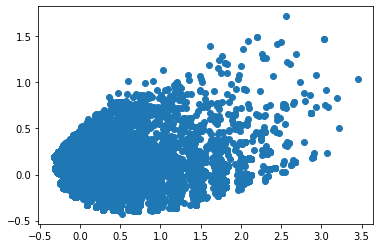

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(pca_data[:,0], pca_data[:,1])
plt.show()

In [ ]:
from sklearn.cluster import KMeans
num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0).fit(pca_data)

In [ ]:
lst = list(kmeans.labels_)
for i in range(num_clusters):
  print(str(i) + ":" + str(lst.count(i)))

0:13871
1:1446
2:4317
3:9511
4:884
5:1350
6:9684
7:3136
8:5732
9:1986


In [ ]:
df["adstatus"].value_counts()

ساعاتی پیش    48208
۱ روز پیش     18756
۱ هفته پیش    15165
دقایقی پیش    13422
لحظاتی پیش    12156
۲ روز پیش     11864
۲ هفته پیش    10335
۳ روز پیش      8621
۳ هفته پیش     7908
۴ روز پیش      6951
۵ روز پیش      5864
۶ روز پیش      4939
۴ هفته پیش     2446
۱ ماه پیش      1104
۲ ماه پیش       688
۷ ماه پیش       264
۳ ماه پیش       232
۴ ماه پیش       202
۱ سال پیش       172
۵ ماه پیش        84
۶ ماه پیش        38
۱۱ ماه پیش       25
۱۰ ماه پیش       24
۸ ماه پیش        24
۹ ماه پیش        23
Name: adstatus, dtype: int64

In [ ]:
pd.get_dummies(df, columns=["item","adstatus", "source"]).head()

,Unnamed: 0,userid,time,count_views,item_A,item_B,item_C,adstatus_دقایقی پیش,adstatus_ساعاتی پیش,adstatus_لحظاتی پیش,adstatus_۱ روز پیش,adstatus_۱ سال پیش,adstatus_۱ ماه پیش,adstatus_۱ هفته پیش,adstatus_۱۰ ماه پیش,adstatus_۱۱ ماه پیش,adstatus_۲ روز پیش,adstatus_۲ ماه پیش,adstatus_۲ هفته پیش,adstatus_۳ روز پیش,adstatus_۳ ماه پیش,adstatus_۳ هفته پیش,adstatus_۴ روز پیش,adstatus_۴ ماه پیش,adstatus_۴ هفته پیش,adstatus_۵ روز پیش,adstatus_۵ ماه پیش,adstatus_۶ روز پیش,adstatus_۶ ماه پیش,adstatus_۷ ماه پیش,adstatus_۸ ماه پیش,adstatus_۹ ماه پیش,source_Android,source_Chrome
0,0,1274821301586/54e79450-bbee-4770-9e47-1d56e120...,2021-05-05 18:00:00.000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1274821301586/54e79450-bbee-4770-9e47-1d56e120...,2021-05-05 18:00:00.000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2,1325384907441/5e5766d8-46cb-480d-886a-7d557542...,2021-05-01 10:00:00.000,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,1325384907441/5e5766d8-46cb-480d-886a-7d557542...,2021-05-01 10:00:00.000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4,1337524499886/ad464731-6288-4e04-8a1a-aa9c004f...,2021-05-03 05:00:00.000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
